In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [30]:
# Load the data
df = pd.read_csv('best_fitness_sublist_df.csv', index_col=None, header=0)
print(df.head())

              1             2             3             4            5  \
0  9.650398e+08  1.715368e+06  45208.423897   9273.442078  4307.827294   
1  9.657695e+08  1.744649e+06  57560.705539  11947.309400  6796.973869   
2  1.025236e+09  1.639219e+06  34577.063608   8686.205149  3917.145023   
3  1.088986e+09  1.336061e+06  34269.905494   8118.841542  3510.054784   
4  1.126181e+09  1.277247e+06  41441.042899  11265.520637  5929.140495   

             6            7            8            9           10  ...  393  \
0  2281.141504  1496.999771  1273.657267  1108.164550   964.289488  ...  NaN   
1  5430.625894  4005.755099  3432.171471  3233.822150  3022.582033  ...  NaN   
2  2739.694003  2104.362216  1612.656137  1408.413566  1165.562630  ...  NaN   
3  2347.168786  1941.608873  1478.804603  1231.004491  1094.501651  ...  NaN   
4  3349.437864  2557.189806  1876.304644  1525.976752  1289.923527  ...  NaN   

   394  395  396  397  398  399  400  Algorithm  Function  
0  NaN  NaN  N

In [31]:
# move df['Algorithm'] to the first column, df['Function'] to the second column
cols = list(df)
cols.insert(0, cols.pop(cols.index('Algorithm')))
cols.insert(1, cols.pop(cols.index('Function')))
df = df.loc[:, cols]
print(df.head())

  Algorithm Function             1             2             3             4  \
0  Baseline       F5  9.650398e+08  1.715368e+06  45208.423897   9273.442078   
1  Baseline       F5  9.657695e+08  1.744649e+06  57560.705539  11947.309400   
2  Baseline       F5  1.025236e+09  1.639219e+06  34577.063608   8686.205149   
3  Baseline       F5  1.088986e+09  1.336061e+06  34269.905494   8118.841542   
4  Baseline       F5  1.126181e+09  1.277247e+06  41441.042899  11265.520637   

             5            6            7            8  ...  391  392  393  \
0  4307.827294  2281.141504  1496.999771  1273.657267  ...  NaN  NaN  NaN   
1  6796.973869  5430.625894  4005.755099  3432.171471  ...  NaN  NaN  NaN   
2  3917.145023  2739.694003  2104.362216  1612.656137  ...  NaN  NaN  NaN   
3  3510.054784  2347.168786  1941.608873  1478.804603  ...  NaN  NaN  NaN   
4  5929.140495  3349.437864  2557.189806  1876.304644  ...  NaN  NaN  NaN   

   394  395  396  397  398  399  400  
0  NaN  NaN  NaN 

In [32]:
# set [algorithm, function] as index
df.set_index(['Algorithm', 'Function'], inplace=True)
print(df.head())

                               1             2             3             4  \
Algorithm Function                                                           
Baseline  F5        9.650398e+08  1.715368e+06  45208.423897   9273.442078   
          F5        9.657695e+08  1.744649e+06  57560.705539  11947.309400   
          F5        1.025236e+09  1.639219e+06  34577.063608   8686.205149   
          F5        1.088986e+09  1.336061e+06  34269.905494   8118.841542   
          F5        1.126181e+09  1.277247e+06  41441.042899  11265.520637   

                              5            6            7            8  \
Algorithm Function                                                       
Baseline  F5        4307.827294  2281.141504  1496.999771  1273.657267   
          F5        6796.973869  5430.625894  4005.755099  3432.171471   
          F5        3917.145023  2739.694003  2104.362216  1612.656137   
          F5        3510.054784  2347.168786  1941.608873  1478.804603   
         

In [33]:
df = df.stack()
print(df)

Algorithm  Function    
Baseline   F5        1     9.650398e+08
                     2     1.715368e+06
                     3     4.520842e+04
                     4     9.273442e+03
                     5     4.307827e+03
                               ...     
Baldwin    F21       36   -2.682860e+00
                     37   -2.682860e+00
                     38   -2.682860e+00
                     39   -2.682860e+00
                     40   -2.682860e+00
Length: 68538, dtype: float64


In [34]:
# rename the column name
df = df.reset_index()
df.rename(columns={'level_2': 'Iteration', 0: 'Best Fitness'}, inplace=True)

In [35]:
print(df.head())

  Algorithm Function Iteration  Best Fitness
0  Baseline       F5         1  9.650398e+08
1  Baseline       F5         2  1.715368e+06
2  Baseline       F5         3  4.520842e+04
3  Baseline       F5         4  9.273442e+03
4  Baseline       F5         5  4.307827e+03


In [36]:
print(len(df))

68538


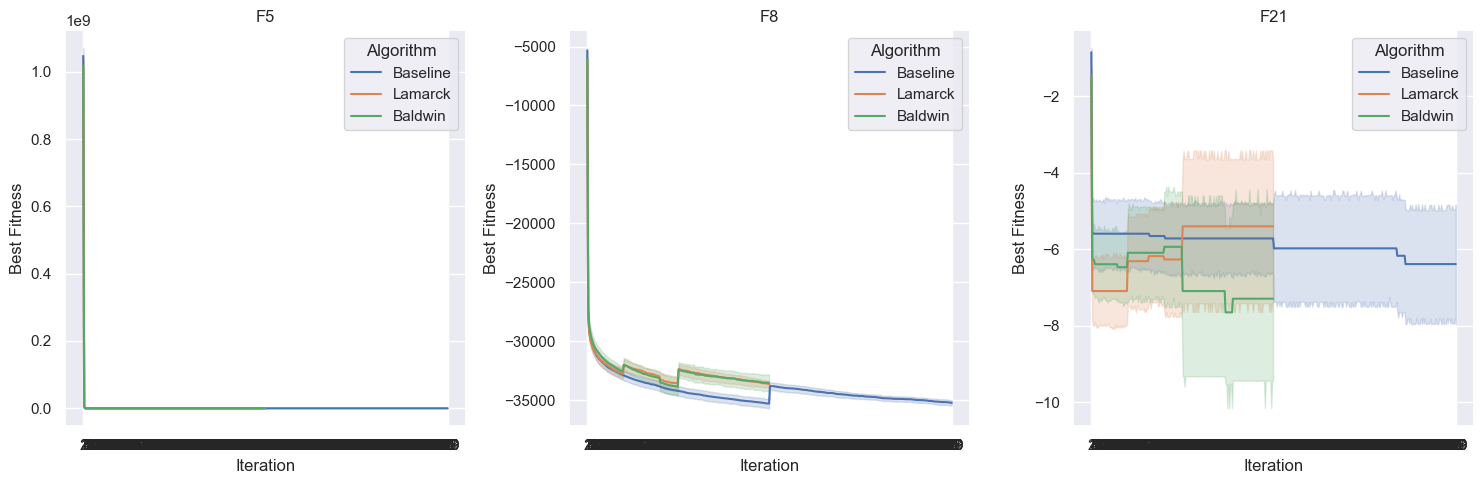

In [37]:
# make lineplot
cols = 3
rows = 1
plt.subplots(rows, cols, figsize=(15, 5))
for i, function in enumerate(df['Function'].unique()):
    plt.subplot(rows, cols, i+1)
    sns.lineplot(x='Iteration', y='Best Fitness', hue='Algorithm', data=df[df['Function'] == function])
    plt.title(function)
plt.tight_layout()
plt.show()

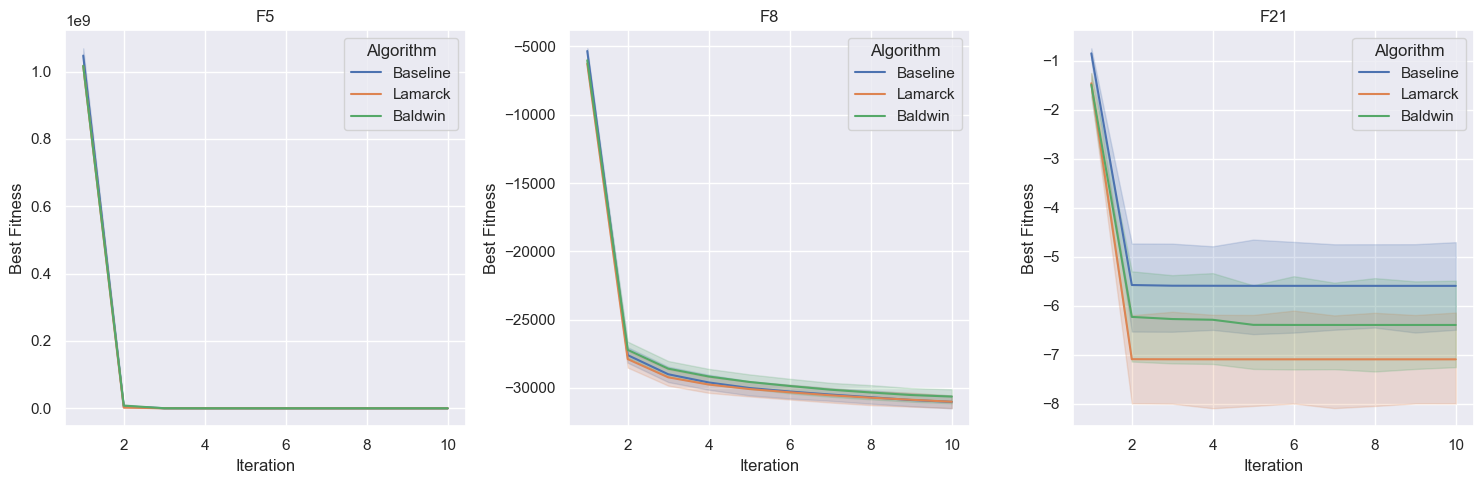

In [41]:
# filter out the first 100 iterations
df['Iteration'] = df['Iteration'].astype(int)
df = df[df['Iteration'] <= 10]
cols = 3
rows = 1
plt.subplots(rows, cols, figsize=(15, 5))
for i, function in enumerate(df['Function'].unique()):
    plt.subplot(rows, cols, i+1)
    sns.lineplot(x='Iteration', y='Best Fitness', hue='Algorithm', data=df[df['Function'] == function])
    plt.title(function)
plt.tight_layout()
plt.show()